In [ ]:
!pip install pycountry
!pip install langdetect
from textblob import TextBlob
import sys
import tweepy
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import os
import nltk
nltk.download('vader_lexicon')
import pycountry
import re
import string
from wordcloud import WordCloud, STOPWORDS
from PIL import Image
from nltk.sentiment.vader import SentimentIntensityAnalyzer
from langdetect import detect
from nltk.stem import SnowballStemmer
from nltk.sentiment.vader import SentimentIntensityAnalyzer
from sklearn.feature_extraction.text import CountVectorizer


[nltk_data] Downloading package vader_lexicon to /root/nltk_data...
[nltk_data]   Package vader_lexicon is already up-to-date!


In [ ]:
df = pd.read_csv('train.csv',encoding='latin-1')
df.head()

,id,label,tweet
0,1,0,@user when a father is dysfunctional and is s...
1,2,0,@user @user thanks for #lyft credit i can't us...
2,3,0,bihday your majesty
3,4,0,#model i love u take with u all the time in ...
4,5,0,factsguide: society now #motivation


In [ ]:
def percentage(part,whole):
 return 100 * float(part)/float(whole)

noOfTweet = 5000
tweets = df["tweet"].head(5000)
positive = 0
negative = 0
neutral = 0
polarity = 0
tweet_list = []
neutral_list = []
negative_list = []
positive_list = []
count = 0
for tweet in tweets:
 tweet_list.append(tweet)
 analysis = TextBlob(tweet)
 count+=1
 score = SentimentIntensityAnalyzer().polarity_scores(tweet)
 neg = score["neg"]
 neu = score["neu"]
 pos = score["pos"]
 comp = score["compound"]
 polarity += analysis.sentiment.polarity
 #print(comp)
 if comp<0:
   negative_list.append(tweet)
   negative += 1
 elif comp>0:
   positive_list.append(tweet)
   positive += 1
 else:
   neutral_list.append(tweet)
   neutral += 1

positive = percentage(positive, noOfTweet)
negative = percentage(negative, noOfTweet)
neutral = percentage(neutral, noOfTweet)
polarity = percentage(polarity, noOfTweet)
positive = format(positive, ".1f")
negative = format(negative, ".1f")
neutral = format(neutral, ".1f")

In [ ]:
print(positive)

48.0


In [ ]:
#Number of Tweets (Total, Positive, Negative, Neutral)
tweet_list = pd.DataFrame(tweet_list)
neutral_list = pd.DataFrame(neutral_list)
negative_list = pd.DataFrame(negative_list)
positive_list = pd.DataFrame(positive_list)
print("total number: ",len(tweet_list))
print("positive number: ",len(positive_list))
print("negative number: ", len(negative_list))
print("neutral number: ",len(neutral_list))

total number:  5000
positive number:  2172
negative number:  943
neutral number:  1885


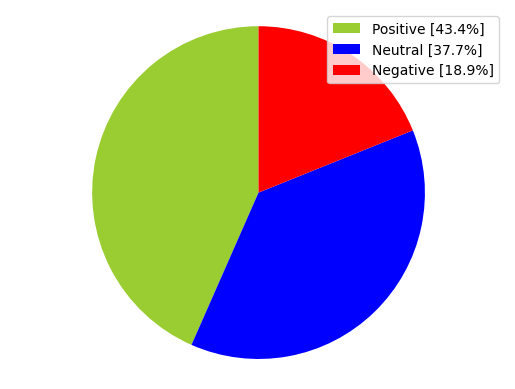

In [ ]:
labels = ["Positive ["+str(positive)+"%]" , "Neutral ["+str(neutral)+"%]","Negative ["+str(negative)+"%]"]
sizes = [positive, neutral, negative]
colors = ["yellowgreen", "blue","red"]
patches, texts = plt.pie(sizes,colors=colors, startangle=90)
plt.style.use("default")
plt.legend(labels)
plt.axis("equal")
plt.show()

In [ ]:
tweet_list.drop_duplicates(inplace = True)

In [ ]:
#Cleaning Text (RT, Punctuation etc)
#Creating new dataframe and new features
tw_list = pd.DataFrame(tweet_list)
tw_list["text"] = tw_list[0]
#Removing RT, Punctuation etc
remove_rt = lambda x: re.sub('RT @\w+: '," ",x)
rt = lambda x: re.sub("(@[A-Za-z0–9]+)|([.-9A-Za-z \t])|(\w+:\/\/\S+)"," ",x)
tw_list["text"] = tw_list.text.map(remove_rt).map(rt)
tw_list["text"] = tw_list.text.str.lower()
tw_list.head(10)

,0,text,polarity,subjectivity,sentiment,neg,neu,pos,compound
0,@user when a father is dysfunctional and is s...,...,0.0,0.0,neutral,0.0,0.0,0.0,0.0
1,@user @user thanks for #lyft credit i can't us...,# ' ...,0.0,0.0,neutral,0.0,0.0,0.0,0.0
2,bihday your majesty,,0.0,0.0,neutral,0.0,0.0,0.0,0.0
3,#model i love u take with u all the time in ...,# ...,0.0,0.0,neutral,0.0,1.0,0.0,0.0
4,factsguide: society now #motivation,: #,0.0,0.0,neutral,0.0,0.0,0.0,0.0
5,[2/2] huge fan fare and big talking before the...,[ ] ...,0.0,0.0,neutral,0.0,0.0,0.0,0.0
6,@user camping tomorrow @user @user @user @use...,ã¢ââ¦,0.0,0.0,neutral,0.0,1.0,0.0,0.0
7,the next school year is the year for exams.Ã°Â...,ã°â...,0.0,0.0,neutral,0.0,1.0,0.0,0.0
8,we won!!! love the land!!! #allin #cavs #champ...,!!! !!! # # # ...,0.0,0.0,neutral,0.0,1.0,0.0,0.0
9,@user @user welcome here ! i'm it's so #gr...,! ' ' # !,0.0,0.0,neutral,0.0,0.0,0.0,0.0


In [ ]:
tw_list[["polarity", "subjectivity"]] = tw_list["text"].apply(lambda Text: pd.Series(TextBlob(Text).sentiment))
for index, row in tw_list["text"].iteritems():
 score = SentimentIntensityAnalyzer().polarity_scores(row)
 neg = score["neg"]
 neu = score["neu"]
 pos = score["pos"]
 comp = score["compound"]
 if neg > pos:
  tw_list.loc[index, "sentiment"] = "negative"
 elif pos > neg:
  tw_list.loc[index, "sentiment"] = "positive"
 else:
  tw_list.loc[index, "sentiment"] = "neutral"
  tw_list.loc[index, "neg"] = neg
  tw_list.loc[index, "neu"] = neu
  tw_list.loc[index, "pos"] = pos
  tw_list.loc[index, "compound"] = comp
tw_list.head(10)

,0,text,polarity,subjectivity,sentiment,neg,neu,pos,compound
0,@user when a father is dysfunctional and is s...,...,0.0,0.0,neutral,0.0,0.0,0.0,0.0
1,@user @user thanks for #lyft credit i can't us...,# ' ...,0.0,0.0,neutral,0.0,0.0,0.0,0.0
2,bihday your majesty,,0.0,0.0,neutral,0.0,0.0,0.0,0.0
3,#model i love u take with u all the time in ...,# ...,0.0,0.0,neutral,0.0,1.0,0.0,0.0
4,factsguide: society now #motivation,: #,0.0,0.0,neutral,0.0,0.0,0.0,0.0
5,[2/2] huge fan fare and big talking before the...,[ / ] ...,0.0,0.0,neutral,0.0,0.0,0.0,0.0
6,@user camping tomorrow @user @user @user @use...,ã¢ââ¦,0.0,0.0,neutral,0.0,1.0,0.0,0.0
7,the next school year is the year for exams.Ã°Â...,.ã°â...,0.0,0.0,neutral,0.0,1.0,0.0,0.0
8,we won!!! love the land!!! #allin #cavs #champ...,!!! !!! # # # ...,0.0,0.0,neutral,0.0,1.0,0.0,0.0
9,@user @user welcome here ! i'm it's so #gr...,! ' ' # !,0.0,0.0,neutral,0.0,0.0,0.0,0.0
